# **ELLIOT PORTER - EE263 - Matrix Methods - HW1** 
## September 28, 2025

In [1]:
### PREMBLE
#import Pkg
#Pkg.add("Markdown")

using LinearAlgebra
using Plots
using Statistics
using Random
using Graphs
using GraphPlot
using Colors
using Markdown
Random.seed!(42)
cardinal = colorant"#8C1515"


### Helper Functions for Plotting calculated adjacencies

In [2]:
function latex_matrix(A::AbstractMatrix)
    # ensure dense, but avoid reconverting if already a Matrix
    denseA = A isa Matrix ? A : Matrix(A)
    
    latex_str = "\\begin{bmatrix}\n" *
        join([join(string.(row), " & ") for row in eachrow(denseA)], " \\\\\n") *
        "\n\\end{bmatrix}"
    
    # escape $ so Julia doesn't think it's interpolation
    return Markdown.parse("\$\$" * latex_str * "\$\$")
end

latex_matrix (generic function with 1 method)

## Problem 2.61: Matrix representation of polynomial differentiation

Let  

$$
p(x) = a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + \cdots + a_1x + a_0,
$$  

with coefficient vector  
$$(a_0, a_1, \ldots, a_{n-1}) \in \mathbb{R}^n.$$  

Consider the linear transformation \(D\) that differentiates polynomials, i.e.,  

$$
Dp = \frac{dp}{dx}.
$$  

Find the matrix \(D\) that represents this operation (i.e., if the coefficients of \(p\) are given by \(a\), then the coefficients of \(dp/dx\) are given by \(Da\)).  


### Q2.61 Analysis

Okay we can denote a vector $a \in \mathbb{R}^{nx1}$
Where the order is of ascending indices:
$$
\begin{bmatrix}
a_0\\
a_1 \\
a_2 \\
a_3 \\
\vdots \\
a_n
\end{bmatrix}
$$

Likewise for the vector, $x \in \mathbb{R}^{1xn}$
$$
[\, x_0\: x_1 \; x_2 \; x_3 \; \cdots \; x_n \,]
$$

In [3]:
function p(x, a)
    if length(x) != length(a)
        error("vectors x and a are not the same size")
    end
    n = length(x)
    x_poly = zeros(n)
    for i in 1:n
        x_poly[i] = x[i] ^ i
    end
    return x_poly .* a
end

function take_derive(p::Vector)
    n = length(p)
    dp = zeros(n)
    for i in 2:n
        dp[i-1] = (i-1) * p[i]
    end
    return dp
end

    

take_derive (generic function with 1 method)

In [4]:
#example usage
x = collect(1:3)
println(x)
a = ones(3)
println(a)
f = p(x, a)
println(f)
df = take_derive(f)


[1, 2, 3]
[1.0, 1.0, 1.0]
[1.0, 4.0, 27.0]


3-element Vector{Float64}:
  4.0
 54.0
  0.0

### Finding the transition matrix

We know that the relationship between the vectors satisfies:  

$$
A \, X = y
$$  

#### where:
- $A$ is the transition matrix $D$
- $X$ is our polynomial coefficient vector $a = [a_0, a_1, \ldots, a_{n-1}]^T$
- $y$ is our derivative polynomial coefficient vector, $Da$

#### We know:
- $X$ is of length $n$
- $y$ is also of length $n$ (last entry is always $0$) because of the chain rule

#### Therefore:
- $A$ (i.e. $D$) must be of shape $n \times n$
- The action of $D$ is to shift coefficients down one index, multiplying by the original index $k$

#### Explicitly:
$$
Da = \big[\, a_1,\; 2a_2,\; 3a_3,\; \ldots,\; (n-1)a_{n-1},\; 0 \,\big]^T
$$  

Thus $D$ has entries $1,2,3,\ldots,n-1$ above its diagonal (super diagonal) , with zeros elsewhere.


In [5]:
# make coefficient matrix
function get_diff_coeff_matrix(n::Int)
    D = zeros(n, n)
    for i in 1:n-1
        D[i, i+1] = i
    end
    return D
end

function make_diff_coeff(a::Vector)
    n = length(a)
    D = get_diff_coeff_matrix(n)
    return round.(D*a, digits=3)
end


make_diff_coeff (generic function with 1 method)

In [6]:
# Example coefficient vectors
a_vecs = [
    ones(7),               # vector of 7 ones
    collect(1:6),          # [1,2,3,4,5,6]
    [1.0, 2.0, 2.5, 1.4]   # custom vector
]

for (i, a) in enumerate(a_vecs)
    println("On example $i")
    println("a = $a")
    display(get_diff_coeff_matrix(length(a)))
    println("da = $make_diff_coeff(a)")
    println("")
end

On example 1
a = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


7×7 Matrix{Float64}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  2.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  3.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  4.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  5.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  6.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

da = make_diff_coeff(a)

On example 2
a = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


6×6 Matrix{Float64}:
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  2.0  0.0  0.0  0.0
 0.0  0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  4.0  0.0
 0.0  0.0  0.0  0.0  0.0  5.0
 0.0  0.0  0.0  0.0  0.0  0.0

da = make_diff_coeff(a)

On example 3
a = [1.0, 2.0, 2.5, 1.4]


4×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 0.0  0.0  2.0  0.0
 0.0  0.0  0.0  3.0
 0.0  0.0  0.0  0.0

da = make_diff_coeff(a)



## Problem 2.100: A mass subject to applied forces

A unit mass is subject to a time-varying force $f(t)$ for $0 \leq t \leq n$.  
The initial position and velocity of the mass are zero. Suppose that the force has the form  

$$
f(t) = x_j, \quad \text{for } j-1 \leq t < j, \quad j = 1, \ldots, n.
$$  

Let $y_1$ and $y_2$ denote, respectively, the position and velocity of the mass at time $t=n$.  

1. Find the matrix $A \in \mathbb{R}^{2 \times n}$ such that  

$$
y = Ax.
$$  

2. For $n=4$, find a sequence of input forces $x_1, \ldots, x_4$ that moves the mass to position 1 with velocity 0 at time $n$.  


### **Q2.100 Analysis**

**Dynamics**

$$F = m a, \qquad m=1 \;\;\Rightarrow\;\; F = a$$

Let the applied force be $F = f(t)$. Then


$$a = \frac{dv}{dt} = f(t)$$

Where: 
$$f(t) = x_j \text{ for } t \in [0, n] \text{ and } [j-1, j]$$

Lets denote speed as $v$ and position as $z$, Integrating:


$$v(t) = \int f(t)\,dt + v_0 = f(t)\,dt + v_0,$$

$$z(t) = \frac{1}{2} f(t)\,dt^2 + v_0 t + z_0.$$

---

**Discrete Timesteps**

But for discrete intervals of size $dt$, which is just 1:

$$v_j = f(t)\,dt + v_{j-1},$$

$$z_j = \tfrac{1}{2} f(t)\,dt^2 + v_{j-1}\,dt + z_{j-1}.$$

But $dt=1$ in this case. 

---


**Vector Representation**

$$
\begin{bmatrix}
z_i \\
v_i
\end{bmatrix}
=
\begin{bmatrix}
\tfrac{1}{2} f(t)\,dt^2 + v_{i-1}\,dt + z_{i-1} \\
f(t)\,dt + v_{i-1}
\end{bmatrix}$$

** Simplifying for $f(t) = x_j$ and $dt=1$ **
$$
\begin{bmatrix}
z_j \\
v_j
\end{bmatrix}
\begin{bmatrix}
\tfrac{1}{2} x_j\, + v_{j-1}\, + z_{j-1} \\
x_j + v_{j-1}
\end{bmatrix}$$

Identity! because $v_j = x_j - v{j-1}$ and $v_{j-1} = x_{j-1} + v_{j-2} ...$ we can rewrite each term as a series. 
So $v_j$ becomes:
$$ v_j = \sum_{k=1}^{j} x_k$$
And then $z_j$ would become:
$$z_j = \sum_{k=1}^j \frac{1}{2}x_j + v_{j-1} + z_{j-1}  $$

Since:
$$v_{j-1} = \sum_{k=1}^{j-1} x_k $$ 

And: 
$$z_{j-1} = \sum_{m=1}^{j-1} \left( \sum_{k=1}^{m-1} x_k + \tfrac{1}{2}x_m \right)$$ 

We can substitute into the $z_j$ equation:

$$z_n = \sum_{j=1}^n \left( \sum_{k=1}^{j-1} x_k + \tfrac{1}{2}x_j \right).$$

---

**Step: Swap the order of summation**

$$\sum_{j=1}^n \sum_{k=1}^{j-1} x_k = \sum_{k=1}^n \sum_{j=k+1}^n x_k.$$

For a fixed $k$, the term $x_k$ appears whenever $j > k$, i.e. for
$j = k+1, \dots, n$. That gives $(n-k)$ occurrences of $x_k$.
$$\sum_{j=1}^n \sum_{k=1}^{j-1} x_k = \sum_{k=1}^n (n-k)\,x_k.$$

---

**Final form for position**

$$z_n = \sum_{k=1}^n \Big( (n-k) + \tfrac{1}{2} \Big)\,x_k.$$

Here:
- $(n-k)$ counts how many full steps remain after force $x_k$ is applied,
- $\tfrac{1}{2}x_k$ is the extra distance from the acceleration during the same step.


So the final expression for the vector, $y$ denoting position, $z_j$ and velocity, $v_j$
$$ y = 
\begin{bmatrix}
z_j \\
v_j
\end{bmatrix}
=
\begin{bmatrix}
\sum_{k=1}^j \Big( (j-k) + \tfrac{1}{2} \Big)\,x_k \\
 \sum_{k=1}^{j} x_k
\end{bmatrix} = Ax$$

Each component is a **linear combination** of the inputs $x_k$, so we can write this as a matrix–vector product.

**Factoring out $x = [x_1,\dots,x_j]^T$:**

$$
y =
\begin{bmatrix}
(j-1)+\tfrac12 & (j-2)+\tfrac12 & \cdots & 1+\tfrac12 & \tfrac12 \\
1 & 1 & \cdots & 1 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{j-1} \\ x_j
\end{bmatrix}.
$$

And so,

$$
y = A x,
$$

where the top row of $A$ encodes the decreasing weights $(j-k)+\tfrac12$ for position, and the bottom row of $A$ is all ones for velocity.


### now write the code to express $y=Ax$

x vector: [1, 2, 3, 4, 5]

v vector: [1.0, 3.0, 6.0, 10.0, 15.0]

pos vector: [0.5, 2.5, 7.0, 15.0, 27.5]


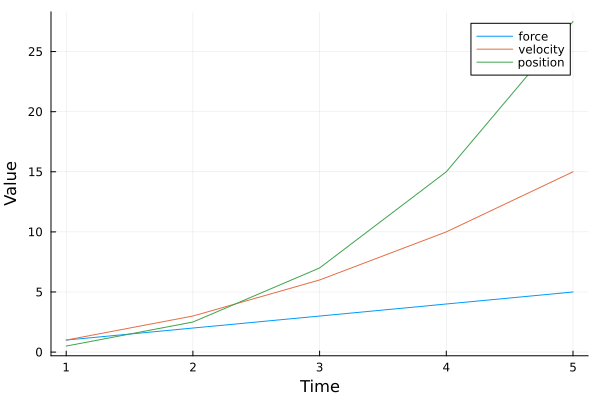

In [7]:
#y = ax
n = 5
#x = rand(1:14, n)
x = collect(1:n)
pos_0 = 0
vel_0 = 0

#function enforces the dynamics based off of what is going on, assumes dt=1, and will be used for validation of our A mtx

function get_y_vec(x, p_0, v_0)
    n = length(x)
    pos = zeros(n)
    vel = zeros(n)
    # get first indices
    vel[1] = x[1] + v_0
    pos[1] = (0.5 * x[1]) + (v_0) + p_0
    for i in 2:n
        vel[i] = x[i] + vel[i-1]
        pos[i] = 0.5*x[i] + vel[i-1] + pos[i-1]
    end
    return vel, pos
end

v, pos = get_y_vec(x, pos_0, vel_0)

println("x vector: ", x)
println("\nv vector: ", v)
println("\npos vector: ", pos)

tsteps = 1:n

plot(tsteps, x, label="force", xlabel="Time", ylabel="Value", legend=:topright)
plot!(tsteps, v, label="velocity")
plot!(tsteps, pos, label="position")

In [13]:
### now make the A matrix
function make_A_mtx(n)
    A = zeros(2, n)
    for i in 1:n
        #velocity
        A[1, i] = 1
        #position
        A[2, i] = (n-i) + 0.5
    end
    return A
end
A = make_A_mtx(n)
println("A matrix:")
display(A)
# now check and validate
p_v = A * x
println(p_v)

A matrix:


2×5 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0
 4.5  3.5  2.5  1.5  0.5

[15.0, 27.5]


In [15]:
# now validate other cases where we still have pos_0 = 0 and vel_0 = 0
n = 6
p_0, v_0 = 0, 0
x1 = rand(1:6, n)
x2 = ones(n)
x3 = collect(1:n)
v1, p1 = get_y_vec(x1, p_0, v_0)
v2, p2 = get_y_vec(x2, p_0, v_0)
v3, p3 = get_y_vec(x3, p_0, v_0)
A = make_A_mtx(n)
y1 = A *x1
y2 = A *x2
y3 = A*x3

println("\nTest case 1: random x = ", x1)
println("Matrix form y1 = ", y1)
println("Recursive v1[ end ] = ", v1[end], ", p1[end] = ", p1[end])

println("\nTest case 2: x = ones")
println("Matrix form y2 = ", y2)
println("Recursive v2[ end ] = ", v2[end], ", p2[end] = ", p2[end])

println("\nTest case 3: x = 1:n")
println("Matrix form y3 = ", y3)
println("Recursive v3[ end ] = ", v3[end], ", p3[end] = ", p3[end])




Test case 1: random x = [4, 4, 3, 2, 4, 1]
Matrix form y1 = [18.0, 62.0]
Recursive v1[ end ] = 18.0, p1[end] = 62.0

Test case 2: x = ones
Matrix form y2 = [6.0, 18.0]
Recursive v2[ end ] = 6.0, p2[end] = 18.0

Test case 3: x = 1:n
Matrix form y3 = [21.0, 45.5]
Recursive v3[ end ] = 21.0, p3[end] = 45.5


## Problem 2.110: Counting paths in an undirected graph

Consider an undirected graph with \(n\) nodes and no self-loops (i.e., all branches connect two different nodes).  
Let $A \in \mathbb{R}^{n \times n}$ be the adjacency matrix, defined as  

$$
A_{ij} =
\begin{cases}
1 & \text{if there is a branch from node $i$ to node $j$}, \\
0 & \text{otherwise}.
\end{cases}
$$  

Note that $A = A^T$ and $A_{ii}=0$.  

Let  

$$
B = A^k, \quad k \in \mathbb{Z},\; k \geq 1.
$$  

Give a simple interpretation of $B_{ij}$ in terms of the original graph.  


### Example Graph

Adjacency matrix:
sparse([2, 5, 1, 3, 5, 2, 4, 3, 5, 1, 2, 4], [1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 5, 5)


5×5 Matrix{Int64}:
 0  1  0  0  1
 1  0  1  0  1
 0  1  0  1  0
 0  0  1  0  1
 1  1  0  1  0

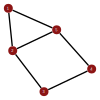

In [9]:
# make an undirected graph with 5 nodes
g = SimpleGraph(5)

# add some edges
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
add_edge!(g, 3, 4)
add_edge!(g, 4, 5)
add_edge!(g, 5, 1)
add_edge!(g, 5, 2)

# adjacency matrix
A = adjacency_matrix(g)
A_dense = Matrix(A)
println("Adjacency matrix:")
println(A)
display(A_dense)

# plot the graph
gplot(g, nodelabel=1:nv(g), 
    nodefillc=color(cardinal),
    nodelabelc=colorant"white",
    edgestrokec=colorant"black")


In [10]:
#print adjacency matrix 
println("Adjacency Matrix for A")
display(latex_matrix(A))


Adjacency Matrix for A


$$
\begin{bmatrix}
0 & 1 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 \\
0 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 \\
1 & 1 & 0 & 1 & 0
\end{bmatrix}
$$


### P2.110 Analysis
- Okay let there be an unstructured graph comprised of $n$ nodes, bidirectional edges, and no self edges.
- The corresponding adjacency matrix of shape $n$ x $n$ and in accordance with bidirectional edges is symmetric, such that:
$$A = A^T$$
$$A_{ii} = 0$$ 

**We know:**
- to get from a given node $i$ to $j$, you apply the adjacency matrix $A_{ij}$ iff, $A_{ij} =1$
- otherwise, you cannot get from node $i$ to $j$ in one step.

**Ex.**
- the graph above has adjacency matrix above
- in the graph above, if you want to get from node $1$ to $3$, you cannot do so in one "step"
- you must go to node $2$ first, then to node $3$.
- now lets show what happens when we square $A$ and visualize what taking 2 "steps" looks like

In [11]:
#do one and 2 steps, then k
A_2 = A_dense^2 
println("Adjacency Matrix for A^2")
display(latex_matrix(A_2))
A_3 = A_dense^3
println("Adjacency Matrix for A^3")
display(latex_matrix(A_3))
k = 4
A_k = A_dense^k
println("Adjacency Matrix for A^k")
display(latex_matrix(A_k))

Adjacency Matrix for A^2


$$
\begin{bmatrix}
2 & 1 & 1 & 1 & 1 \\
1 & 3 & 0 & 2 & 1 \\
1 & 0 & 2 & 0 & 2 \\
1 & 2 & 0 & 2 & 0 \\
1 & 1 & 2 & 0 & 3
\end{bmatrix}
$$


Adjacency Matrix for A^3


$$
\begin{bmatrix}
2 & 4 & 2 & 2 & 4 \\
4 & 2 & 5 & 1 & 6 \\
2 & 5 & 0 & 4 & 1 \\
2 & 1 & 4 & 0 & 5 \\
4 & 6 & 1 & 5 & 2
\end{bmatrix}
$$


Adjacency Matrix for A^k


$$
\begin{bmatrix}
8 & 8 & 6 & 6 & 8 \\
8 & 15 & 3 & 11 & 7 \\
6 & 3 & 9 & 1 & 11 \\
6 & 11 & 1 & 9 & 3 \\
8 & 7 & 11 & 3 & 15
\end{bmatrix}
$$


**Here you can see that:**
- there is a base case $A_{ij} = 1$ where you can go from node $i$ to $j$ in one step
- Each $i, j$ in $A_{ij}^k$ for $k > 1$ represents the total number of ways to get from $i$ to $j$ in $k$  "steps"
- where $(A_{ij})^k$ counts the number of possible ways to get from $i$ to $j$ in $k$ steps

For a dummy index $\ell$, number of nodes, $n$, and any integer $k$, you can denote the number of steps by:
$$(A^{k+1})_{ij}=\sum_{\ell=1}^n (A^k)_{i\ell}\,A_{\ell j}$$
where you take $k$ steps to get from $i$ to $\ell$, and one step from $\ell$ to $j$

Conceptually think of the transisiton from the $A^1$ to $A^2$ where you want to $A_{14}$, but one step does not get you there. So you do
$$(A^{1+1})_{14}=\sum_{\ell=1}^n (A^1)_{1\ell}\,A_{\ell 4}$$
**which reduces to:** 
$$(A^{2})_{14}=\sum_{\ell=1}^n (A^1)_{1\ell}\,A_{\ell 4}$$


## Problem 2.150: Gradient of some common functions

Recall that the gradient of a differentiable function  
$$f: \mathbb{R}^n \to \mathbb{R},$$  
at a point $x \in \mathbb{R}^n$, is defined as  

$$
\nabla f(x) =
\begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}.
$$  

The first-order Taylor approximation of \(f\), near \(x\), is  

$$
\hat{f}_{\text{tay}}(z) = f(x) + \nabla f(x)^T (z - x).
$$  

Find the gradient of the following functions, expressed using matrix notation:  

a) $f(x) = a^T x + b, \quad a \in \mathbb{R}^n, b \in \mathbb{R}$.  

b) $f(x) = x^T A x, \quad A \in \mathbb{R}^{n \times n}$.  

c) $f(x) = x^T A x, \quad A = A^T \in \mathbb{R}^{n \times n}$.  


### P2.150 Analysis

#### Part A

So $a$ is a vector of length $n$. where $x$ is also a vector of length $n$. and $b$ is a scalar.  
Assuming that the $x$ vector is filled with scalar entries and not $i$th degree polynomial $x_i$ for the $i$th entry in an $x$ vector length $n$.  
Then, $$df(x) = a^T dx$$ 
or $$df(x_i) = a^T_i dx_i$$

#### Part B

So we can start by applying the chain rule to $f(x)$ for both $x$ terms.  
where $$df(x) = dx^T(Ax) + (x^T A)dx$$  
Since the first term is just a scalar, you can transpose it without changing it. so taking the transpose of the first term you get:  
$$ dx^T(Ax) = dx(A^T x^T)$$
$$df(x) = dx (A^T x^T) + (x^T A) dx$$  
now you can factor out and rewrite  
$$df(x) = (x^T(A^T + A))dx$$  
so now we have to take the transpose of $df(x)$ to get the taylor expansion  
It then becomes $$ \nabla f(x)^T = (A + A^T)x$$

#### Part C

now starting from the point in b where we have $df(x) = (x^T(A + A^T)dx$  
now we can write that $$\nabla f(x)^T = (x^T(A + A))^T$$  
it becomes $$\nabla f(x)^T  = (x(2A^T) \text{ but }A = A^T$$ so it reduces to $$\nabla f(x)^T  = 2Ax$$


### Problem 2.210: Express in matrix language

Express the following statements in matrix language (assume all matrices have appropriate dimensions).  

a) Suppose $Z$ has $n$ columns. For each $i$, row $i$ of $Z$ is a linear combination of rows $i, \ldots, n$ of $Y$.  

b) $W$ is obtained from $V$ by permuting adjacent odd and even columns (i.e., 1 and 2, 3 and 4, …).  

c) Each column of $P$ makes an acute angle with each column of $Q$.  

d) Each column of $P$ makes an acute angle with the corresponding column of $Q$.  

e) The first $k$ columns of $A$ are orthogonal to the remaining columns of $A$.  


### P2.210 Analysis

#### Part A
Z is a vector which exists such that: $$Z: \mathbb{R}^n$$   Such that: $$Z = Ay$$  
where: $$A: \mathbb{R}^{n \times m} \text{ and } y: \mathbb{R}^m$$
#### Part B
For vector $W: \mathbb{R}^n$ it can be yielded from the by permuting the odd and even columns of the horizontal vector $V: \mathbb{R}^n$ by permuting (switching) the odd and even indices, with a Permutation matrix, $P: \mathbb{R}^{n \times n}$, such that:$$ W = PV$$
#### Part C
For Matrix $P: \mathbb{R}^{n \times m}$ and Matrix $Q: \mathbb{R}^{n \times m}$
to align each row and column of P and Q, you can take the transpose of one of the matrices: $$P^TQ$$
Now recall that the dot product between to vectors, say x and y is: $\frac{cos(\theta)}{||x|| ||y||}$, where $\theta$ is the angle between the two vectors. 
Since we take the transpose of P, the product at the $i$th index is equal to the magnitude of the columns times the cosine of the angle between them. And because cosine of $\theta$ is greater than zero if acute, the resulting equation 
#### Part D

Each column of $P$ makes an acute angle with the corresponding column of $Q$.  
This means that the dot product between the $j$-th column of $P$ and the $j$-th column of $Q$ is positive.  
So we can write:

$$p_j^T q_j > 0, \quad \forall j,$$

or in compact form:

$$\operatorname{diag}(P^T Q) > 0.$$

---

#### Part E

The first $k$ columns of $A$ are orthogonal to the remaining columns of $A$.  
If we partition $A$ into two blocks, $A = [A_1 \; A_2]$, where $A_1$ contains the first $k$ columns and $A_2$ contains the rest, then the condition is:

$$A_1^T A_2 = 0.$$
